In [320]:
import numpy as np
import os
import json
import pycpd
from scipy import interpolate as ip
from matplotlib import pyplot as plt

In [321]:
def extract_annotation(data):
    for item in data:
        if 'classification' in item['properties']:
            if item['properties']['classification']['name'] == 'Region*':
                annotation_list = []
                for sublist in item['geometry']['coordinates']:
                    for sublist2 in sublist:
                        for point in sublist2:
                            annotation_list.append(point)
                return np.array(annotation_list)

In [322]:
file_path_anno = ['data/Annotation-C.json', 
                  'data/Annotation-D.json',
                  'data/Annotation-E.json',
                  'data/Annotation-F.json',
                  'data/Annotation-G.json',
                  'data/Annotation-H.json']

x_annotations = []
y_annotations = []

for path in file_path_anno:
    annotation = []
    with open(path) as f:
        data = json.load(f)
    annotation = extract_annotation(data)
    x_annotation = annotation[:,0]
    x_annotations.append(x_annotation)
    y_annotation = annotation[:,1]
    y_annotations.append(y_annotation)

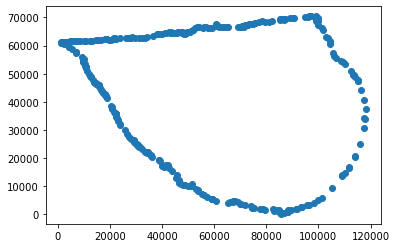

In [323]:
# Annotation C
plt.scatter(x_annotations[0],y_annotations[0])

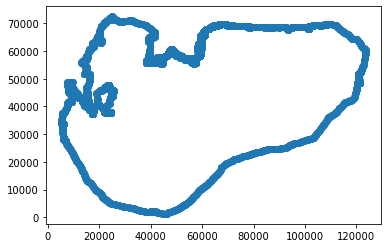

In [324]:
# Annotation D
plt.scatter(x_annotations[1],y_annotations[1])

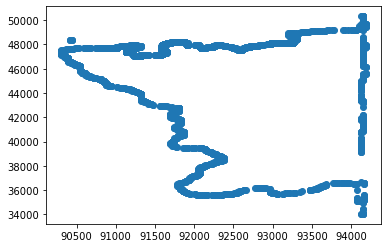

In [325]:
# Annotation E
plt.scatter(x_annotations[2],y_annotations[2])

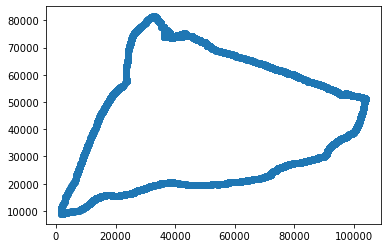

In [326]:
# Annotation F
plt.scatter(x_annotations[3],y_annotations[3])

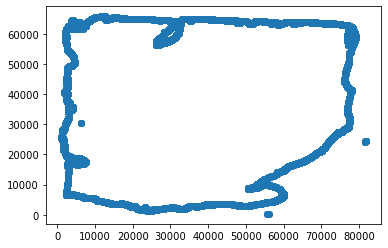

In [327]:
# Annotation G
plt.scatter(x_annotations[4],y_annotations[4])

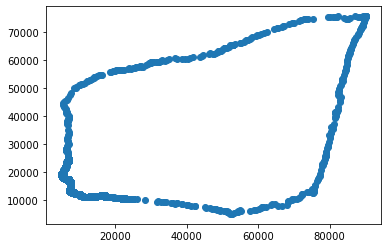

In [328]:
# Annotation H
plt.scatter(x_annotations[5],y_annotations[5])

In [329]:
file_path_cut = ['data/Schnitt-C.obj', 
                 'data/Schnitt-D.obj',
                 'data/Schnitt-E.obj',
                 'data/Schnitt-F.obj',
                 'data/Schnitt-G.obj',
                 'data/Schnitt-H.obj']
x_cuts = []
y_cuts = []

for path in file_path_cut:
    with open(path) as f:
        readlines = f.readlines()
    l = []
    for line in readlines:
        if line.startswith('l '):
            lines = line.split(' ')
            if lines[1] not in l:
                l.append(int(lines[1]))
            if lines[2] not in l:
                l.append(int(lines[2]))
                
    x_cut = []
    y_cut = []
    for index in l:
        splitted = readlines[index-1].split(' ')
        x_cut.append(float(splitted[3]))
        y_cut.append(float(splitted[1]))
    x_cuts.append(x_cut)
    y_cuts.append(y_cut)

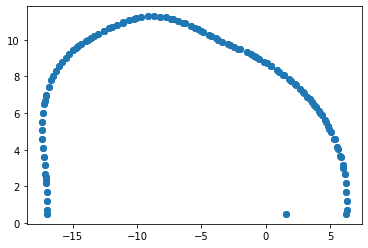

In [330]:
# Schnitt C
plt.scatter(x_cuts[0], y_cuts[0])

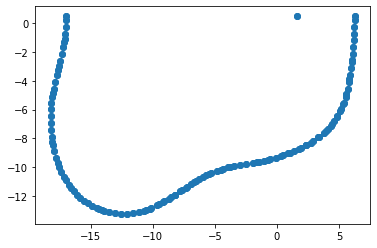

In [331]:
# Schnitt D
plt.scatter(x_cuts[1], y_cuts[1])

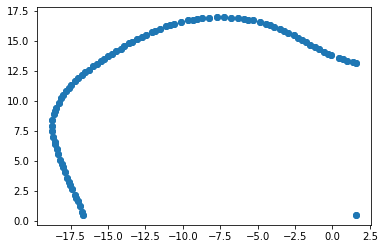

In [332]:
# Schnitt E
plt.scatter(x_cuts[2], y_cuts[2])

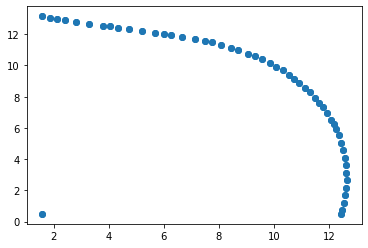

In [333]:
# Schnitt F
plt.scatter(x_cuts[3], y_cuts[3])

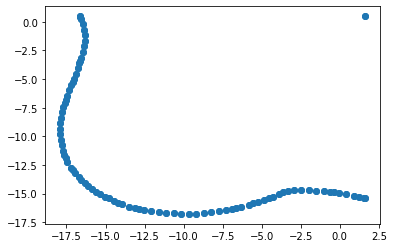

In [334]:
# Schnitt G
plt.scatter(x_cuts[4], y_cuts[4])

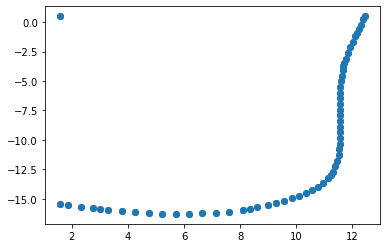

In [335]:
# Schnitt H
plt.scatter(x_cuts[5], y_cuts[5])

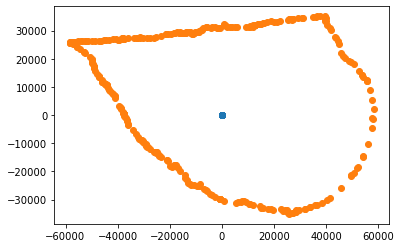

In [336]:
# Vorregestrierung

# https://medium.com/@olga_kravchenko/generalized-procrustes-analysis-with-python-numpy-c571e8e8a421
# *gemeinsamen Nullpunkt finden
x_edited_anns=[]
y_edited_anns=[]
x_edited_cuts=[]
y_edited_cuts=[]

def center_list(list):
    #extrema bestimmen
    min_list=min(list)
    max_list=max(list)
    
    #vesrschiebung errechnen
    center=(min_list+max_list)/2
    
    #Punkte verschieben
    return_list=np.array(list)-center
    
    return return_list

for i in range(0, len(x_cuts)):
    x_edited_anns.append(center_list(x_annotations[i]))
    y_edited_anns.append(center_list(y_annotations[i]))
    x_edited_cuts.append(center_list(x_cuts[i]))
    y_edited_cuts.append(center_list(y_cuts[i]))
    
plt.scatter(x_edited_cuts[0],y_edited_cuts[0])
plt.scatter(x_edited_anns[0],y_edited_anns[0])

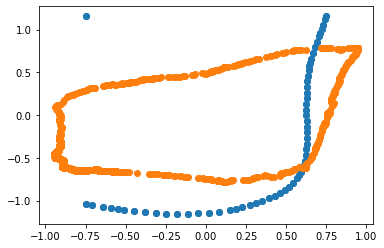

In [337]:
# *Abstände zum Nullpunkt normalisieren
def scale_lists(x_list,y_list):
    dists=np.sqrt(x_list**2 + y_list**2)
    avrg_dist=np.average(dists)
    scaled_x_list=x_list/avrg_dist
    scaled_y_list=y_list/avrg_dist
    return scaled_x_list, scaled_y_list

for i in range(0,len(x_edited_anns)):
    x_edited_anns[i],y_edited_anns[i]= scale_lists(x_edited_anns[i],y_edited_anns[i])
    
for i in range(0,len(x_edited_cuts)):
    x_edited_cuts[i],y_edited_cuts[i]= scale_lists(x_edited_cuts[i],y_edited_cuts[i])

plt.scatter(x_edited_cuts[5],y_edited_cuts[5])
plt.scatter(x_edited_anns[5],y_edited_anns[5])

<Figure size 432x288 with 0 Axes>

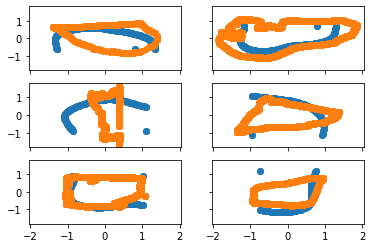

In [338]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(x_edited_anns[i],y_edited_anns[i])
    
#Ergebisse sind Falsch Rotiert und sehen hier verzerrt aus, aber die Ergenisse sollten okay sein 

In [339]:
# *Upsampling - # Interpolation für mehr Punkte

In [340]:
# Point Drift Registrierung

In [341]:
# Flipping und Rotation für das Anpassen der Annotationen
def flip(x_list):
    new_x_list = []
    max_x=max(x_list)
    min_x=min(x_list)
    for x in x_list:
        new_x = min_x + max_x-x
        new_x_list.append(new_x)
    return new_x_list

def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
#    return list(np.moveaxis(a, axis, 0))


def rotate(x_list,y_list,radians):
    theta = np.radians(radians)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    new_coord_list =  []
    new_x_list = []
    new_y_list =  []
    arr = np.stack((x_list,y_list), axis=-1)
    for coord in arr:
        coord = coord.flatten()
        new_coord = R.dot(coord)
        new_coord_list.append(new_coord)
    new_coord_list = np.asfarray(new_coord_list)
    for coord in new_coord_list:
        x,y, = unstack(coord)
        new_x_list.append(x)
        new_y_list.append(y)
    return new_x_list, new_y_list
    
    

In [342]:
collection_x_anns =[]
collection_y_anns = []

# Datei C - vertikaler & horizontaler Flip
x_flipped_anns_c= flip(x_edited_anns[0])
y_flipped_anns_c = flip(y_edited_anns[0])
collection_x_anns.append(x_flipped_anns_c)
collection_y_anns.append(y_flipped_anns_c)

# Für Datei D, Rotation und Ausrichtung richtig. Für andere Dateien problematisch, Lösung suchen
x_flipped_anns_d= x_edited_anns[1]
y_flipped_anns_d= y_edited_anns[1]
collection_x_anns.append(x_flipped_anns_d)
collection_y_anns.append(y_flipped_anns_d)

# Datei E - 90° Rotation
x_flipped_anns_e, y_flipped_anns_e= rotate(x_edited_anns[2], y_edited_anns[2],270)
collection_x_anns.append(x_flipped_anns_e)
collection_y_anns.append(y_flipped_anns_e)

# Datei F - vertikaler Flip - 25° Rotation
x_flipped_anns_f= x_edited_anns[3]
y_flipped_anns_f = flip(y_edited_anns[3])
x_flipped_anns_f, y_flipped_anns_f = rotate(x_flipped_anns_f, y_flipped_anns_f,335)
collection_x_anns.append(x_flipped_anns_f)
collection_y_anns.append(y_flipped_anns_f)

# Datei G - horizontaler Flip
x_flipped_anns_g= flip(x_edited_anns[4])
y_flipped_anns_g = y_edited_anns[4]
collection_x_anns.append(x_flipped_anns_g)
collection_y_anns.append(y_flipped_anns_g)

# Datei H - vertikaler & horizontaler Flip
x_flipped_anns_h= flip(x_edited_anns[5])
y_flipped_anns_h = flip(y_edited_anns[5])
collection_x_anns.append(x_flipped_anns_h)
collection_y_anns.append(y_flipped_anns_h)

<Figure size 432x288 with 0 Axes>

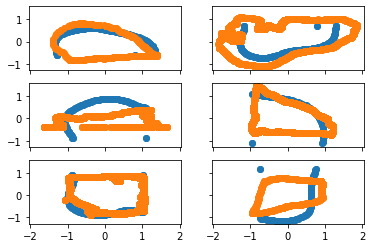

In [343]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(collection_x_anns[i],collection_y_anns[i])

In [344]:
# Programm bereinigen, Abgabefertig machen

In [345]:
def midpoint(p1, p2):
    
    return (p1.x+p2.x)/2, (p1.y+p2.y)/2

In [346]:
# Interpolation 
# https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
# https://numpy.org/doc/stable/reference/generated/numpy.interp.html

for i in range(len(x_edited_anns)):
    xs = x_edited_anns[i]
    ys = y_edited_anns[i]

    plt.figure(figsize=(10,10))

    midpoints_x = []
    midpoints_y = []

    for i_x in range(0,xs.shape[0]):
        idx1 = i_x
        idx2 = i_x+1
    
        if i_x == xs.shape[0]-1:
            idx2 = 0
    
        x1 = xs[idx1]
        x2 = xs[idx2]
        y1 = ys[idx1]
        y2 = ys[idx2]
        m_x = ((x1+x2)/2)
        m_y = ((y1+y2)/2)
        midpoints_x.append(m_x)
        midpoints_y.append(m_y)

    plt.plot(midpoints_x, midpoints_y, 'o', xs, ys, 'o')




TypeError: 'int' object is not iterable

## 